In [1]:
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
ALPHABET = "абвгґдеєжзиіїйклмнопрстуфхцчшщьюя\'"

## Правила

In [3]:
pairs_idx = dict(zip([s1+s2 for s1 in ALPHABET for s2 in ALPHABET], range(len(ALPHABET)**2)))

pattern_clean_1 = '[^"абвгґдеєжзиіїйклмнопрстуфхцчшщьюя\' "]'

def symbol_to_symbol(s):   
    # правило для реєстрації чергування двох символів. 
    # символів -> си им мв во ол лі ів
    s = s.lower()
    s = s.replace('\+', '')
    s = re.sub(pattern_clean_1, '', s)
    s = re.sub(' +', ' ', s)
    s = s.strip()

    pairs = np.zeros([len(ALPHABET)**2], dtype=bool)
    
    for w in s.split():
        for i in range(len(w) - 1):
            pair = w[i:i + 2]
            pairs[pairs_idx[pair]] = True
    return pairs

def word_start_symbol_to_end_symbol(s):  
    # правило для реєстрації чергування двох символів на початку і у кінці слова. 
    # Чергування двох символів. -> чя дх св
    s = s.lower()
    s = s.replace('\+', '')
    s = re.sub(pattern_clean_1, '', s)
    s = re.sub(' +', ' ', s)
    s = s.strip()
    pairs = np.zeros([len(ALPHABET)**2], dtype=bool)
    
    for w in s.split():
        pair = w[0] + w[-1]
        pairs[pairs_idx[pair]] = True
    return pairs

def word_end_symbol_to_pause_to_start_symbol(s):  
    # правило для реєстрації чергування двох символів у кінці слова та на початку наступного слова. 
    # Чергування двох символів. -> яд хс
    s = s.lower()
    s = s.replace('\+', '')
    s = re.sub(pattern_clean_1, '', s)
    s = re.sub(' +', ' ', s)
    s = s.strip()
    words = s.split()
    
    pairs = np.zeros([len(ALPHABET)**2], dtype=bool)    
    
    for i in range(len(words) - 1):
        pair = words[i][-1] + words[i][0]
        pairs[pairs_idx[pair]] = True
    return pairs

def sentence_start_symbol_to_end_symbol(s):  
    # правило для реєстрації чергування двох символів у на початку і у кінці речення. 
    # Чергування двох символів. -> чв
    s = s.lower()
    s = s.replace('\+', '')
    s = re.sub(pattern_clean_1, '', s)
    s = re.sub(' +', ' ', s)
    s = s.strip()
        
    pairs = np.zeros([len(ALPHABET)**2], dtype=bool)    
    if len(s) == 0:
        return pairs
    
    pair = s[0] + s[-1]
    pairs[pairs_idx[pair]] = True
    return pairs

def word_start_to_end(s):  
    # правило для реєстрації чергування двох символів на початку і у кінці слова. 
    # Чергування двох символів. -> чя дх св
    s = s.lower()
    s = s.replace('\+', '')
    s = re.sub(pattern_clean_1, '', s)
    s = re.sub(' +', ' ', s)
    s = s.strip()
    words = s.split()
        
    pairs = np.zeros([len(ALPHABET)**2], dtype=bool)      
    
    for w in words:        
        pair = w[0] + w[-1]
        pairs[pairs_idx[pair]] = True    
    return pairs

def word_not_start_to_not_end(s):  
    # правило для реєстрації чергування двох символів не на початку і не у кінці слова. 
    # Чергування двох символів. -> чя дх св
    s = s.lower()
    s = s.replace('\+', '')
    s = re.sub(pattern_clean_1, '', s)
    s = re.sub(' +', ' ', s)
    s = s.strip()
    words = s.split()
        
    pairs = np.zeros([len(ALPHABET)**2], dtype=bool)    
    
    for w in words:
        for i in range(1, len(w) - 2):
            pair = w[i:i+2]
            pairs[pairs_idx[pair]] = True

    return pairs

rules = [symbol_to_symbol, 
         word_start_symbol_to_end_symbol,
         word_end_symbol_to_pause_to_start_symbol,
         sentence_start_symbol_to_end_symbol,
         word_start_to_end,
         word_not_start_to_not_end,
        ]

def all_rules(s):
    rule = np.hstack([r(s) for r in rules])
    return rule

In [4]:
file = 'data/sentences.txt'

In [5]:
pairs = np.zeros([(len(ALPHABET)**2)*len(rules)], dtype=bool)

## Пошук першого підходящого

In [6]:
opt_sent = []
time_start = time.time()
sentence_read = 0
time_start = time.time()
with open(file, 'r') as fd:
    for i, s in enumerate(fd):    
        sentence_read += 1
        s = s.strip()
        s_raw = s

        s = re.sub('[\–\—«\:\»…\"/?!—,+]+', '', s)

        pair = all_rules(s)
        if (pairs < pair).sum() > 0:
            pairs |= pair
            opt_sent.append(s_raw)

print('Час:', f'{time.time() - time_start:.4f}')
print('Всього речень:', sentence_read)
print('Оптималька кількість речень:', len(opt_sent))
print("Кількість комбінацій символів [абвгґдеєжзиіїйклмнопрстуфхцчшщьюя\']:", len("абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'")**2)
print('Перекриває чергування букв :', f'{int(100*(pairs[:len(ALPHABET)**2]).sum()/1156)}%')

Час: 0.0147
Всього речень: 117
Оптималька кількість речень: 117
Кількість комбінацій символів [абвгґдеєжзиіїйклмнопрстуфхцчшщьюя']: 1156
Перекриває чергування букв : 73%


## Роздрукувати відсутні пари

In [7]:
z = []
for v in pairs_idx.items():
    if pairs[v[1]] == 0:
        #print(v[0])
        if "'" in v[0]:
            continue
        pr = v[0]
        z.append(v[0])
print(z)

['аа', 'ае', 'аи', 'аі', 'ао', 'аь', 'ая', 'бє', 'бї', 'бй', 'бь', 'бю', 'бя', 'вє', 'вї', 'вй', 'вм', 'вь', 'вю', 'вя', 'гї', 'гй', 'гь', 'гю', 'гя', 'ґє', 'ґї', 'ґй', 'ґь', 'ґю', 'дє', 'дї', 'дй', 'дю', 'ее', 'еи', 'еі', 'еу', 'еь', 'єа', 'єб', 'єг', 'єґ', 'єе', 'єє', 'єж', 'єз', 'єі', 'єй', 'єл', 'єо', 'єп', 'єу', 'єх', 'єщ', 'єь', 'єя', 'жє', 'жт', 'жщ', 'жь', 'жю', 'зє', 'зї', 'зй', 'зь', 'иа', 'ие', 'иі', 'ио', 'иу', 'иь', 'ию', 'іе', 'іі', 'іу', 'іь', 'їа', 'їб', 'їг', 'їґ', 'їе', 'їє', 'їі', 'їй', 'їк', 'їл', 'їо', 'їп', 'їр', 'їф', 'їц', 'їч', 'їш', 'їщ', 'їь', 'їя', 'йа', 'йг', 'йґ', 'йе', 'йє', 'йж', 'йз', 'йи', 'йі', 'йї', 'йй', 'йр', 'йу', 'йф', 'йх', 'йщ', 'йь', 'йю', 'йя', 'кґ', 'кє', 'кж', 'кь', 'кя', 'лє', 'лй', 'мґ', 'мє', 'мй', 'мь', 'мю', 'нл', 'оа', 'ое', 'ои', 'оі', 'оо', 'оь', 'пє', 'пж', 'пз', 'пй', 'пь', 'пю', 'пя', 'рє', 'рї', 'рй', 'сґ', 'сж', 'сй', 'сщ', 'тє', 'тй', 'уе', 'уи', 'уі', 'уй', 'уу', 'уц', 'уь', 'уя', 'фв', 'фд', 'фє', 'фз', 'фй', 'фп', 'фх', 'фщ

## Відобразити матрицю зареєстрованих пар

In [8]:
confusion = pairs.reshape(-1, len(ALPHABET),len(ALPHABET))

/tmp/ipykernel_968842/2755654901.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + re.findall('.', ALPHABET), rotation=90, size=18)
/tmp/ipykernel_968842/2755654901.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + re.findall('.', ALPHABET), size=18)


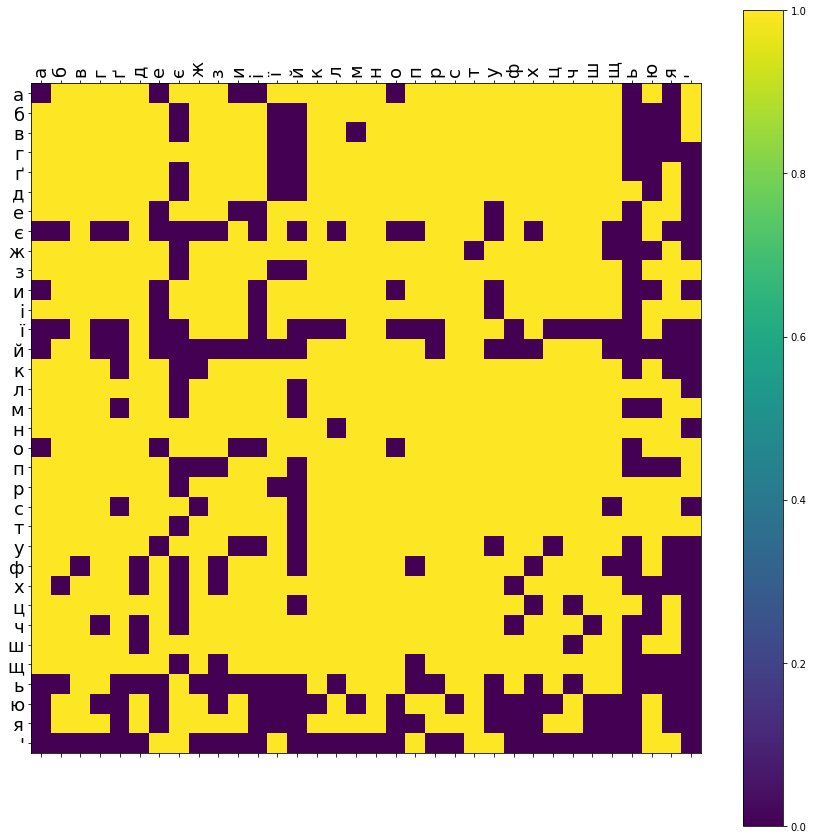

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
cax = ax.matshow(confusion[0])
fig.colorbar(cax)

ax.set_xticklabels([''] + re.findall('.', ALPHABET), rotation=90, size=18)
ax.set_yticklabels([''] + re.findall('.', ALPHABET), size=18)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

## Роздрокувати знайдені речення

In [10]:
for s in opt_sent:
    print(s)

Фігґан та Фагщой назвали свій винахід Фіндґой.
Жирафа на ім'я Ґоґпой подружилася з крокодилом на ім'я Поґхон.
Автори проєкту Роґцой порушили ліцензію Оґциня.
Пісня Ліґчана стала дуже популярною серед групи Даґшона.
Організація Оґяна зареєструвала нову зорю під імям Зоґщиця.
Соєина озвучила мультфільм Інжїн та Інжйон про бджілку на імя Лиинта та бобра Ліитон.
Крошова одиниця Коїин набула великої популярності.
Спектрограма показала що цей матеріал Цоїуна.
Фоїюнка це спеціалізований одяг для міжпланетних подорожей.
У експертному середовищі є плутанина з назвами Пікін, Пікїн та Пікйон.
І там Палїт дізнався у якій халепі Толщана з міста Камїм.
Дослідники змогли об'єднати речовини Бухнїн з Бухнйоном при опромінюванні ультрафіолетом.
Діти знайшли уламок топґана серед спаленої трави.
Шопїнський університет показав косїтівський ефект.
Фатїти є дуже небезпечна релігійна течія.
Це не можливо зробити в межах фафґівських аксіом.
Стажист Кафжинський не витримав фізичного знущання.
Деякі люди вимовля